# Compare 2020 demand throughout the year

Data Cleaned. Rides Removed = 463
Data Cleaned. Rides Removed = 463
Data Cleaned. Rides Removed = 466
imported


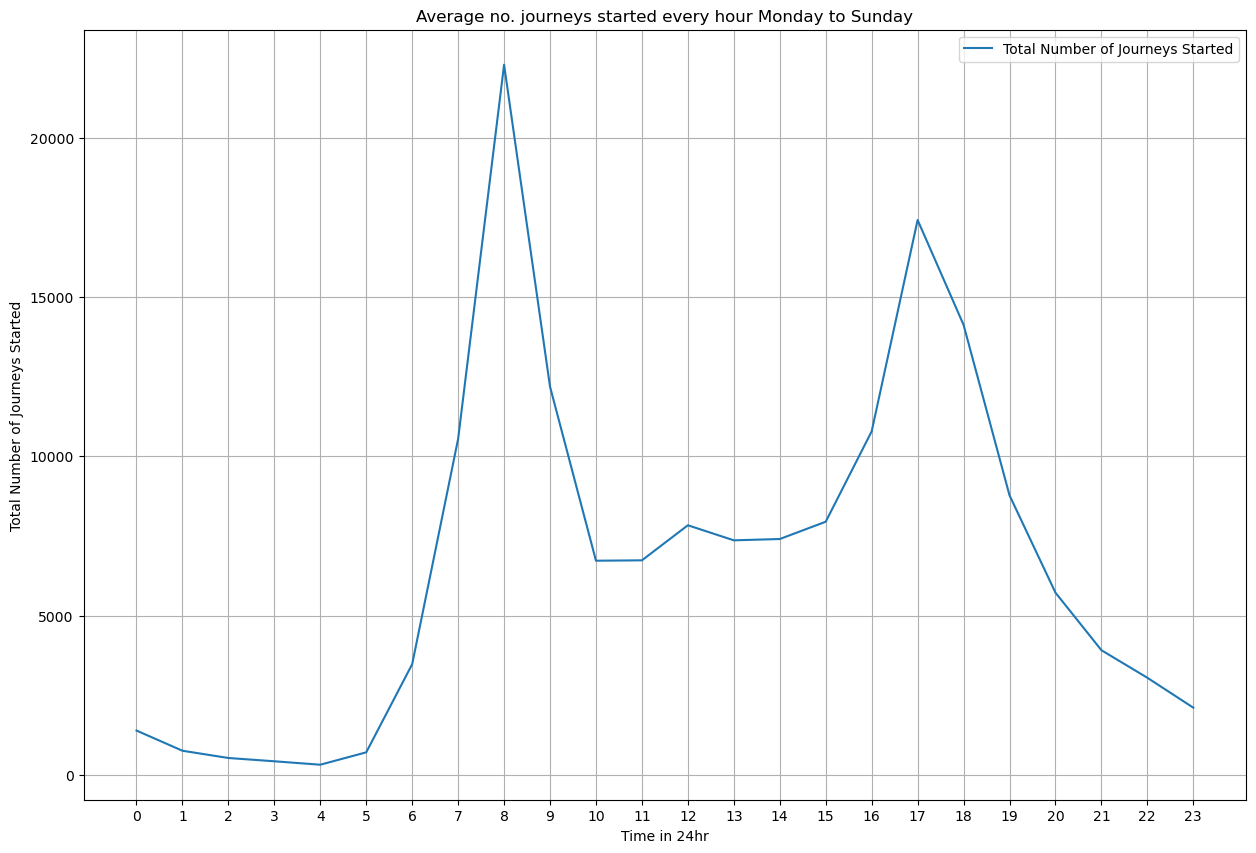

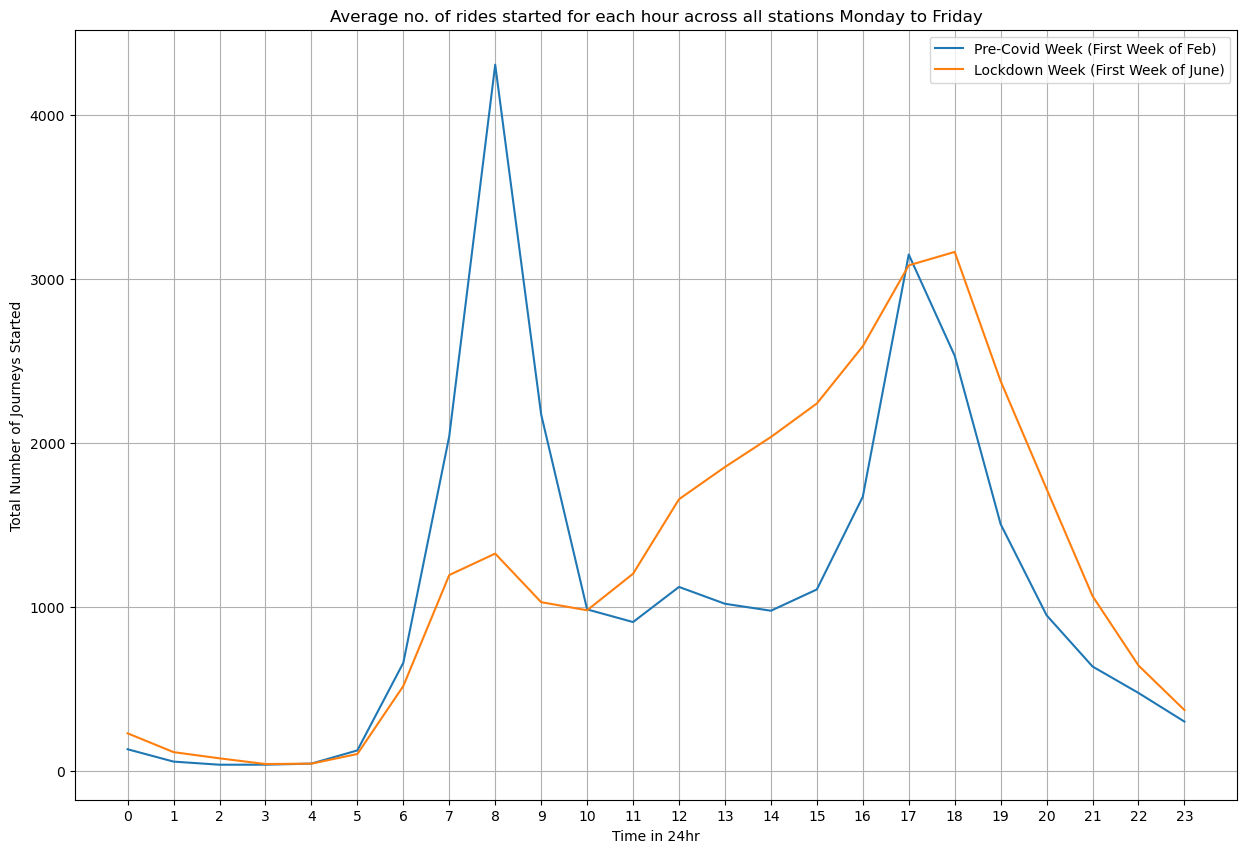

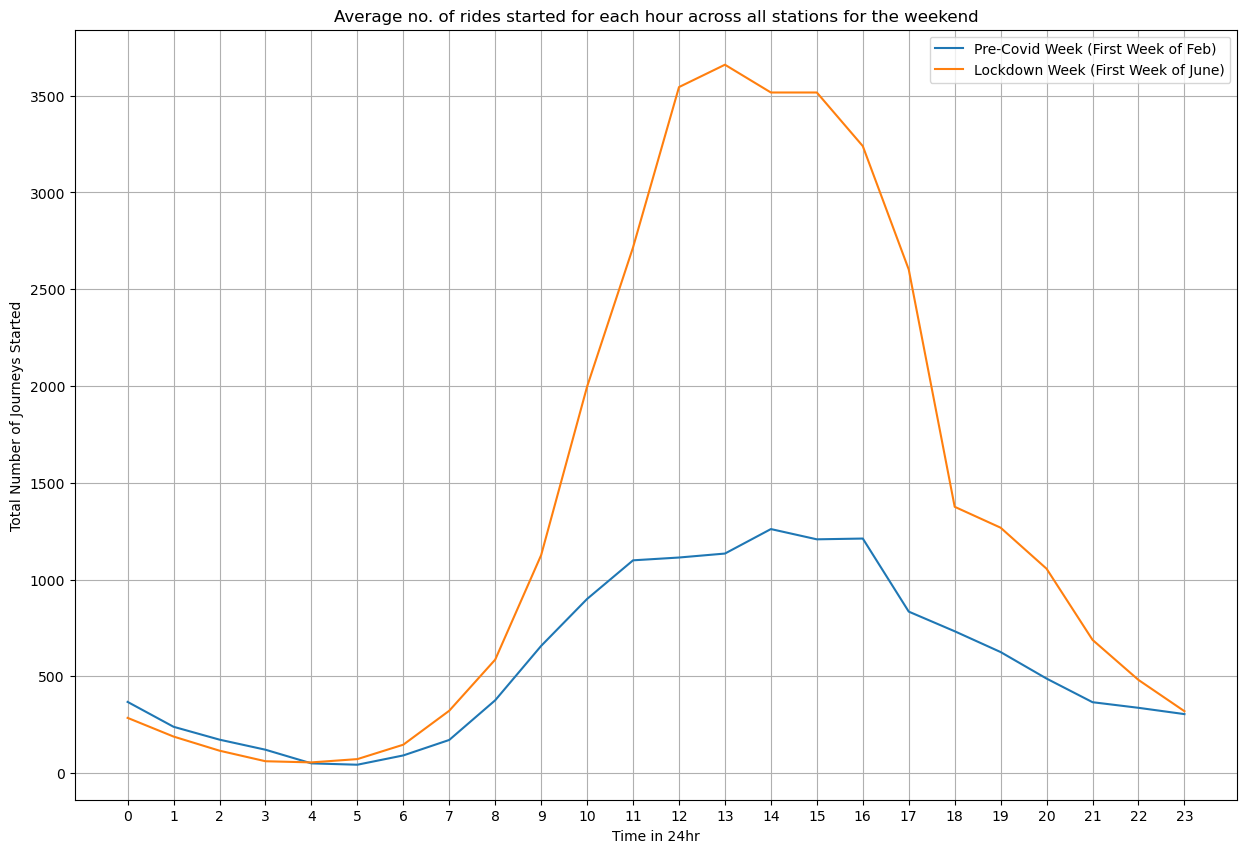

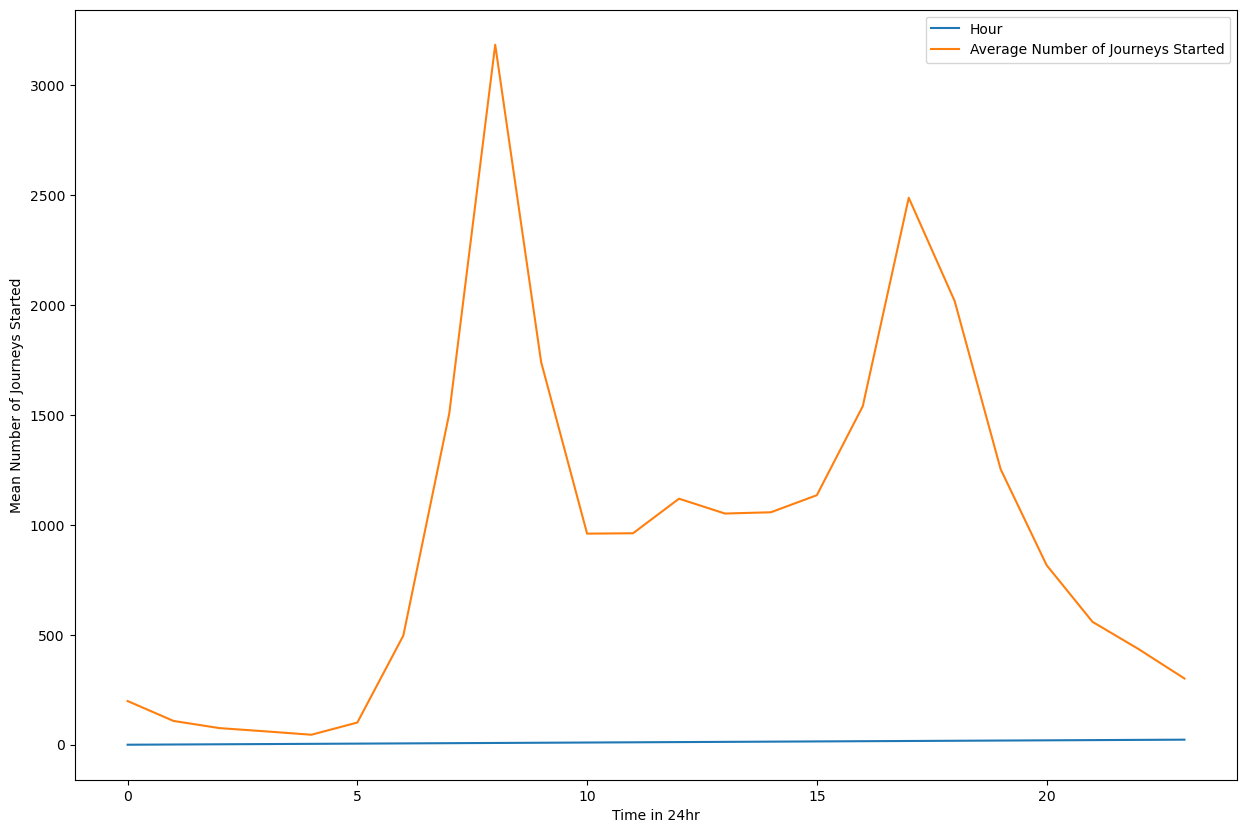

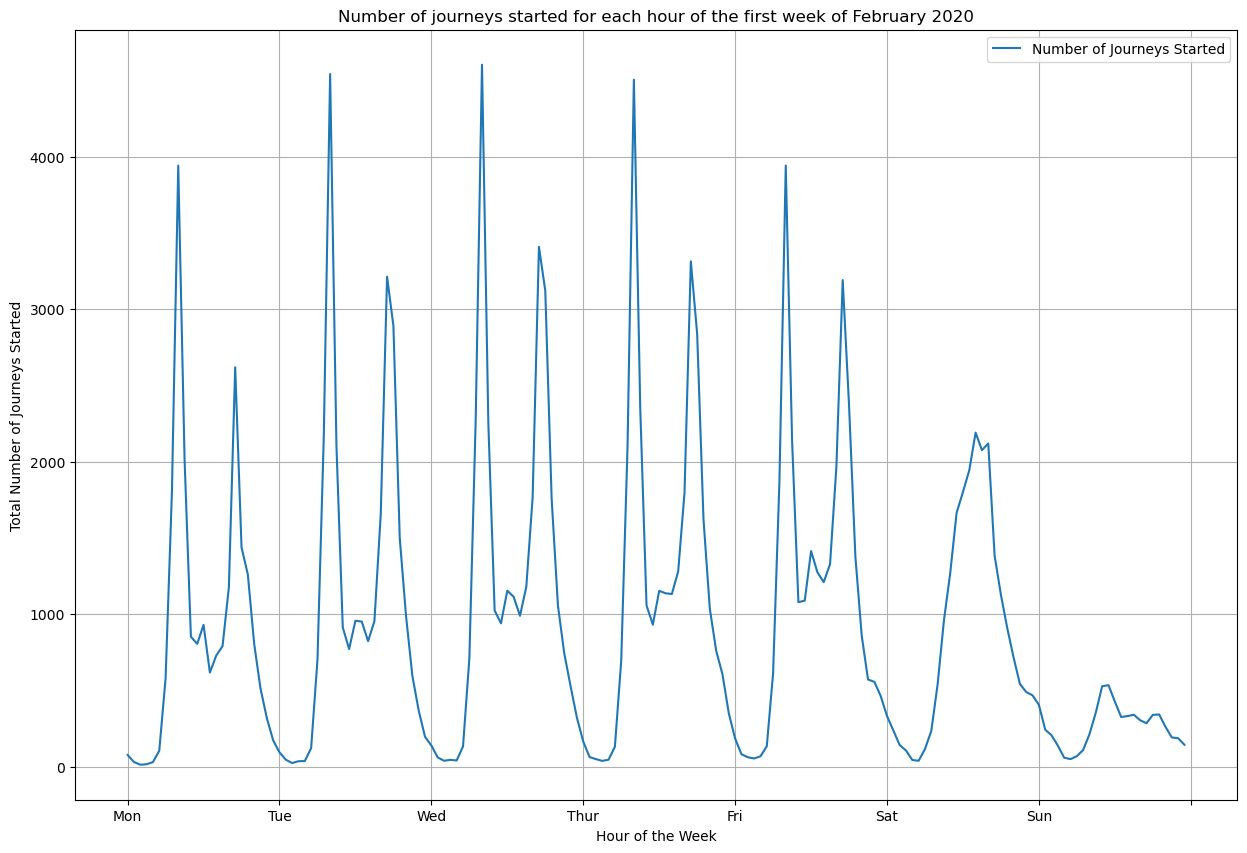

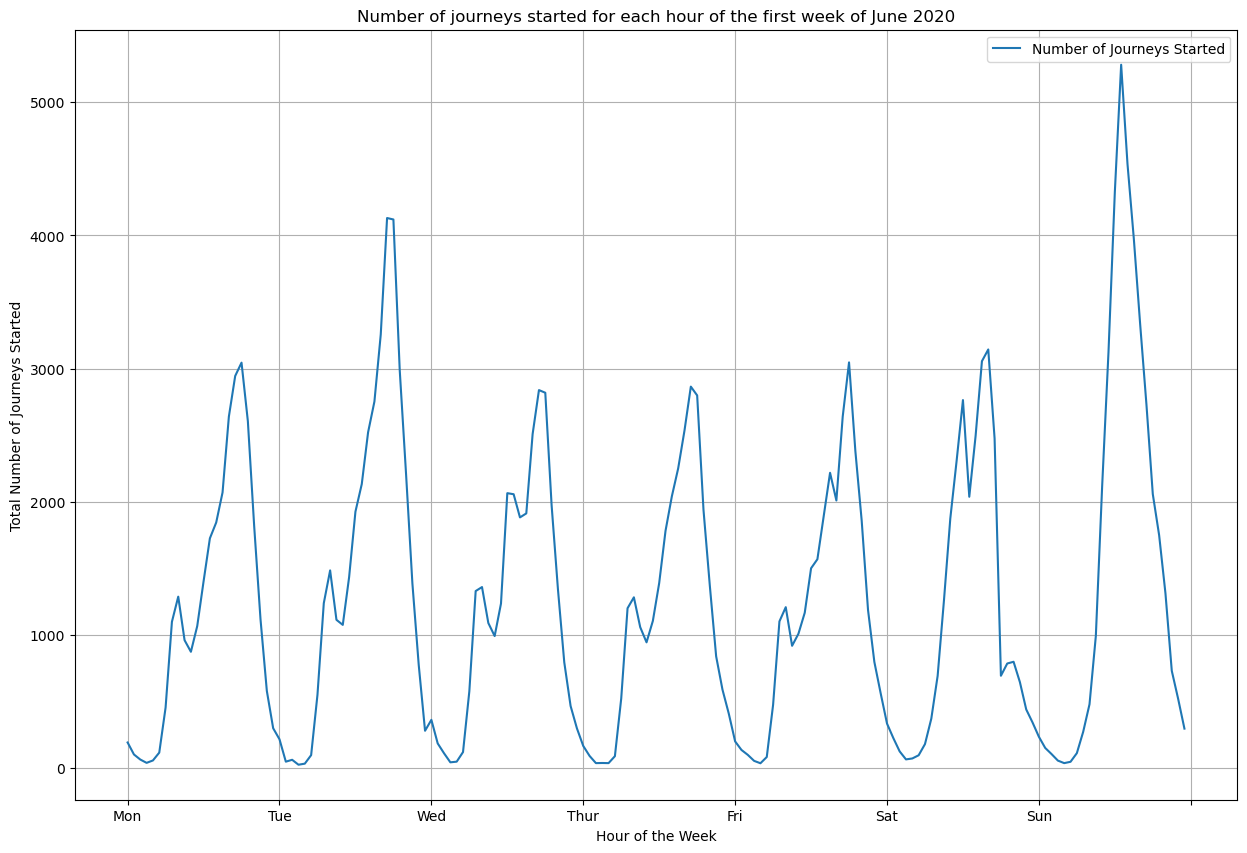

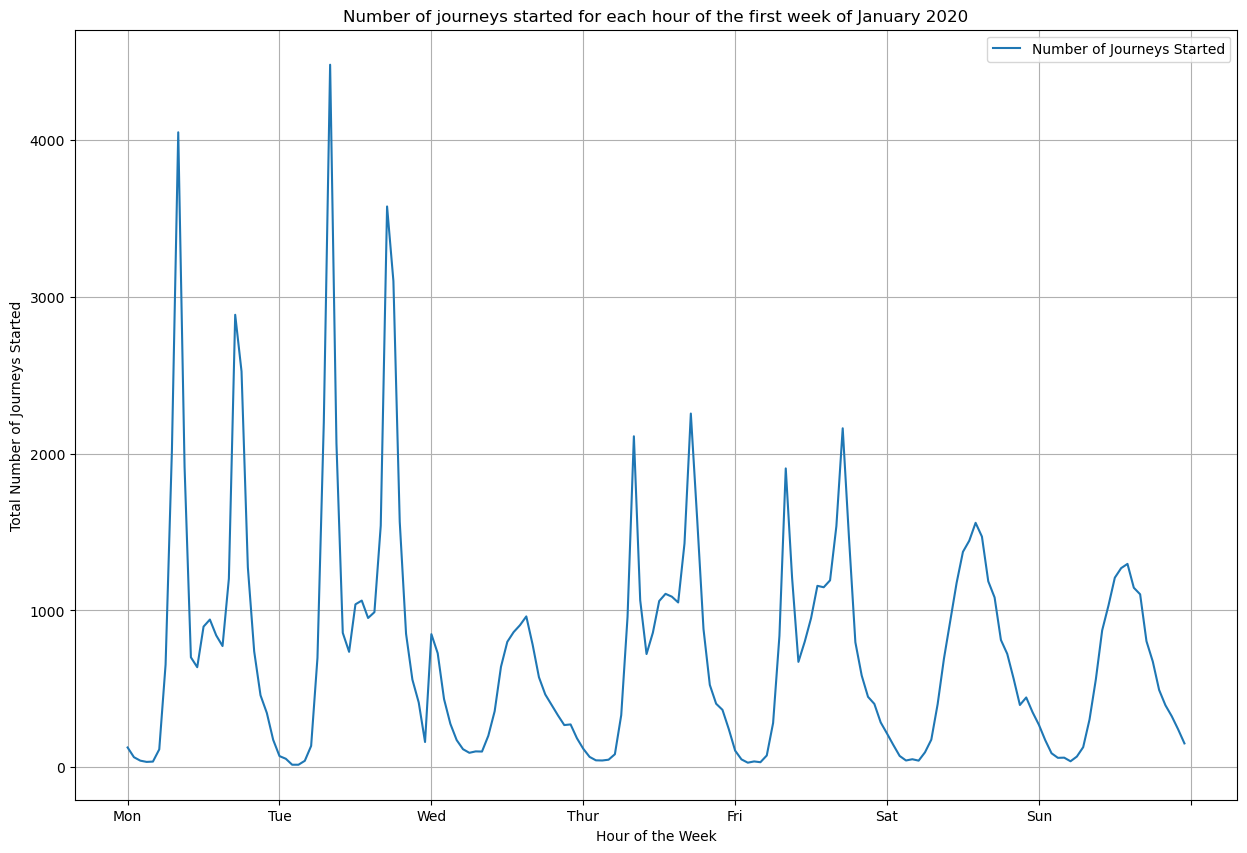

imported


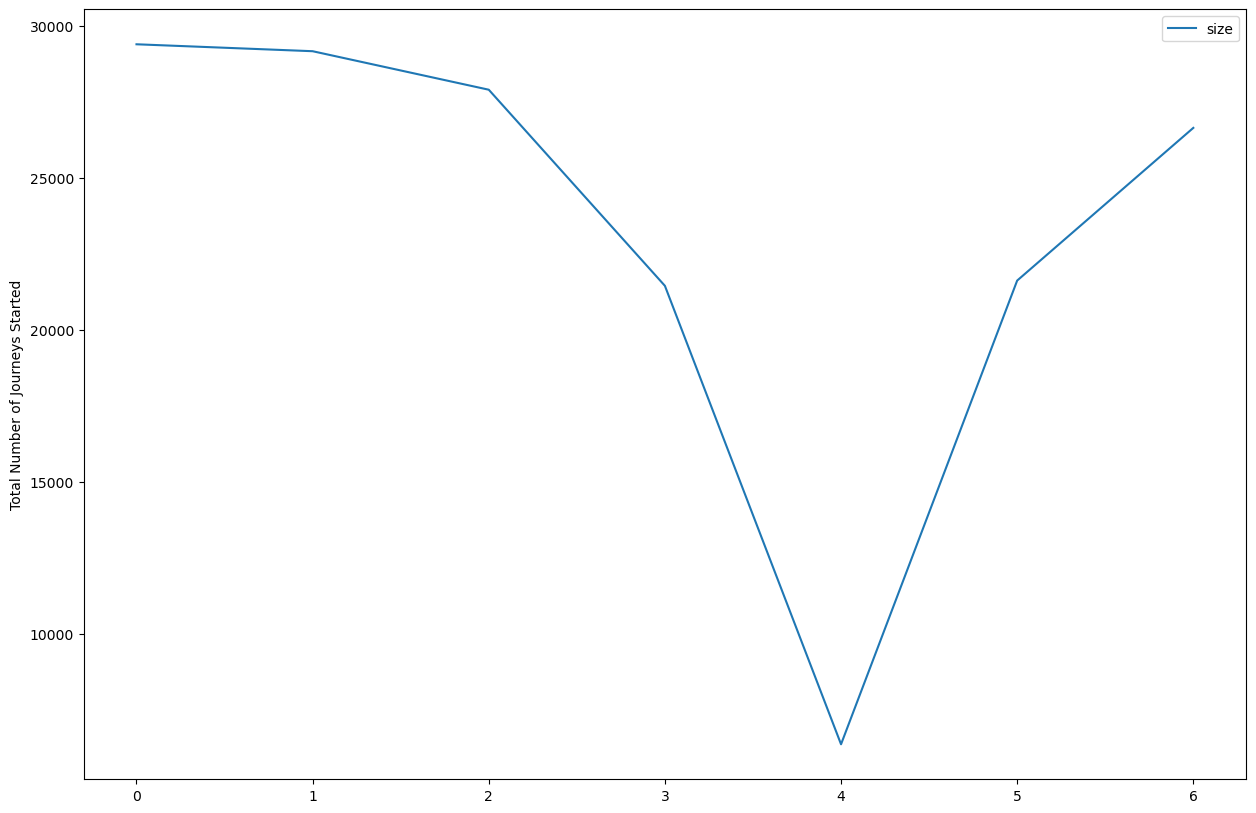

In [2]:
from ipynb.fs.full.Process_Demand import getDFfromCSV, toWeeklyStartedDF, toWeeklyEndedDF, toGroupByDayDF, toGroupByDayDFEnd

In [1]:
import os
import pandas as pd

"""
The data files for the whole year are too large to submit
If you would like to run this code, please download the weekly files for the 
whole year from https://cycling.data.tfl.gov.uk/
and save it in a folder called "Weekly_2020_Files"
that folder and this python file should be in the same folder

"""

directory = "Weekly_2020_Files"
weekly_dfs_list = []

#loops through all 53 weeks of data for the year 2020, 
#coverts csv into DFs and appends the DF to weekly_dfs_arry

for filename in os.scandir(directory):
    if filename.is_file():
        weekly_dfs_list.append(getDFfromCSV(directory+"/"+filename.name))

weekly_dfs_list


NameError: name 'getDFfromCSV' is not defined

In [6]:
weekly_all_daily_activity_list = []

for df in weekly_dfs_list:
    startedJourneysTemp = toWeeklyStartedDF(df)
    startedByDayDFTemp = toGroupByDayDF(startedJourneysTemp)
    
    endedJourneysTemp = toWeeklyEndedDF(df)
    endByDayTemp = toGroupByDayDFEnd(endedJourneysTemp)
    
    totalActivityPerDayAllStationDFTemp = pd.concat([startedByDayDFTemp,endByDayTemp]).groupby(['Day/Month']).sum().reset_index()
    weekly_all_daily_activity_list.append(totalActivityPerDayAllStationDFTemp)
    print("concatted")
    
# weekly_all_daily_activity_array
print(weekly_all_daily_activity_list)


concatted
concatted
concatted
concatted
concatted
concatted
concatted
concatted
concatted
concatted
concatted
concatted
concatted
concatted
concatted
concatted
concatted
concatted
concatted
concatted
concatted
concatted
concatted
concatted
concatted
concatted
concatted
concatted
concatted
concatted
concatted
concatted
concatted
concatted
concatted
concatted
concatted
concatted
concatted
concatted
concatted
concatted
concatted
concatted
concatted
concatted
concatted
concatted
concatted
concatted
concatted
concatted
concatted
[    Day/Month   size
0  2020-01-01  21811
1  2020-01-02  37014
2  2020-01-03  36477
3  2020-01-04  30985
4  2020-01-05  25719
5  2020-01-06  47071
6  2020-01-07  54525,     Day/Month   size
0  2020-01-08  56049
1  2020-01-09  52755
2  2020-01-10  53148
3  2020-01-11  36012
4  2020-01-12  32701
5  2020-01-13  47301
6  2020-01-14  45646,     Day/Month   size
0  2020-01-15  44493
1  2020-01-16  52185
2  2020-01-17  51057
3  2020-01-18  39130
4  2020-01-19  35495
5  20

In [7]:
#totalActivityPerDayAllStationDFTemp.sort_values(by = ['Day/Month'])

In [8]:
#weekly_all_daily_activity_list2 = [df.set_index('id') for df in weekly_all_daily_activity_list]
demandEverydayOfYearDF = pd.concat(weekly_all_daily_activity_list, axis = 0).reset_index().drop("index", axis=1)
demandEverydayOfYearDF.tail()

,Day/Month,size
366,2021-01-01,21979
367,2021-01-02,34626
368,2021-01-03,26911
369,2021-01-04,20568
370,2021-01-05,18900


In [9]:
demandEverydayOfYearDF.max()
demandEverydayOfYearDF.loc[demandEverydayOfYearDF["size"] == "137830"]
demandEverydayOfYearDF.loc[120:150]
#for index, row in demandEverydayOfYearDF.iterrows():


,Day/Month,size
120,2020-04-30,17999
121,2020-05-01,28935
122,2020-05-02,75494
123,2020-05-03,53234
124,2020-05-04,36187
125,2020-05-05,36184
126,2020-05-06,45894
127,2020-05-07,53874
128,2020-05-08,85171
129,2020-05-09,94822


<AxesSubplot:title={'center':'Total demand per day in 2020 for all stations'}, xlabel='Day of the Year', ylabel='Total number of borrow and return requests for all stations on that day'>

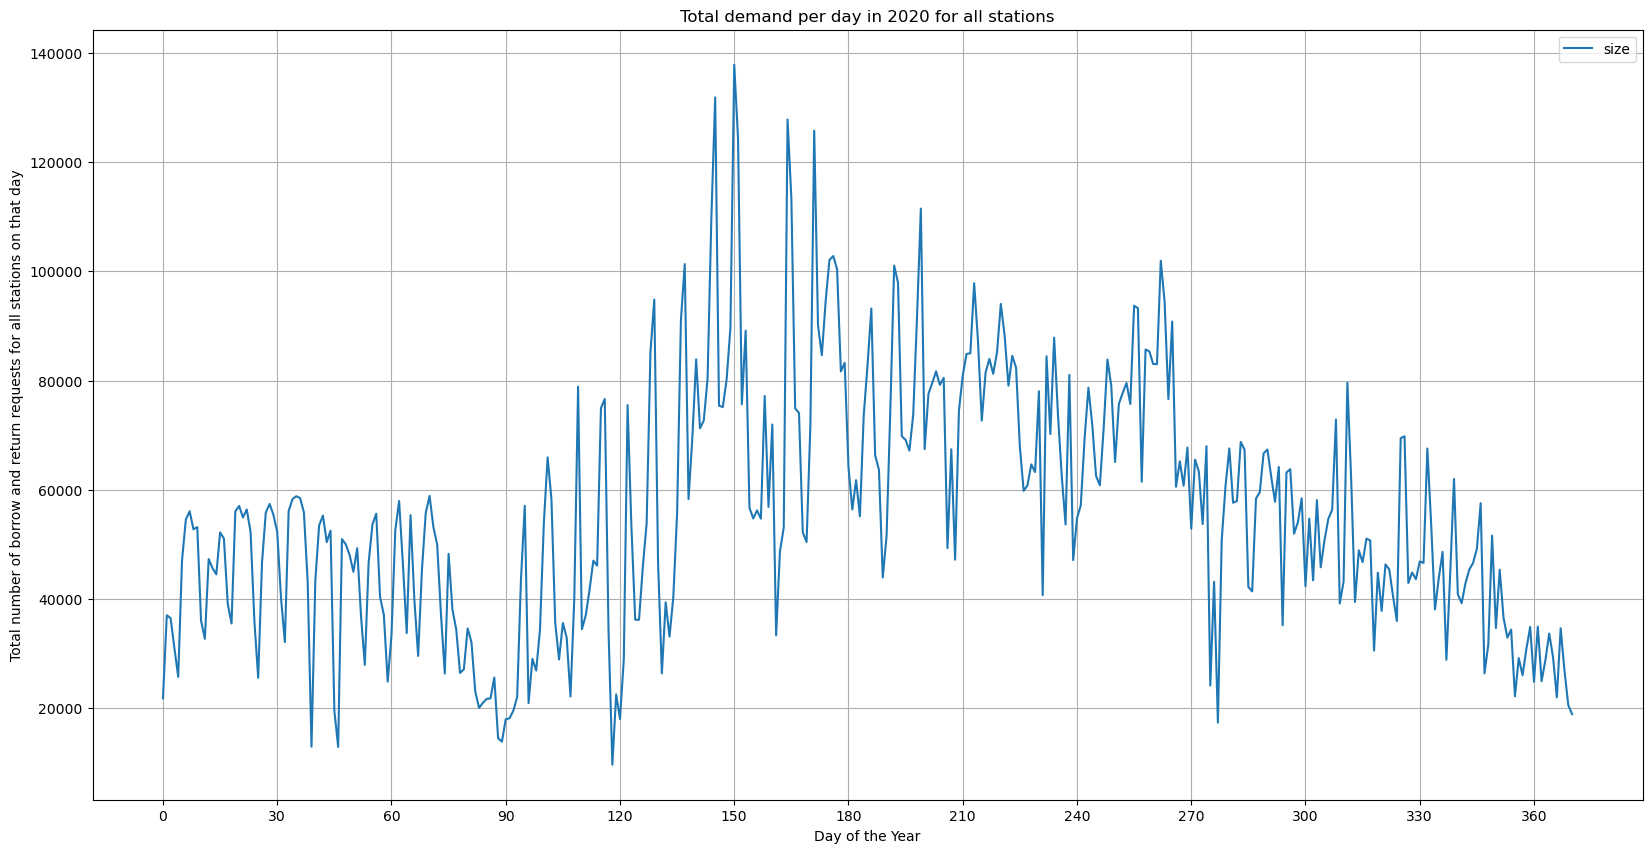

In [10]:
xaxisLabels =[]
for i in range(0,13):
    xaxisLabels.append(i*30)
demandEverydayOfYearDF.plot(kind="line", figsize=(20,10),xticks=xaxisLabels, 
                            title = "Total demand per day in 2020 for all stations", 
                            xlabel= "Day of the Year", 
                            ylabel="Total number of borrow and return requests for all stations on that day",
                            grid = True 
                           )